In [50]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_squared_log_error
import math
from sklearn.preprocessing import StandardScaler,MaxAbsScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, cross_val_score,cross_validate,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import balanced_accuracy_score,precision_score,recall_score
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix

def print_info(variable_name):
    print("---", variable_name, "     type = ", type(eval(variable_name)), "     Value = ", eval(variable_name)," --- ")

def print_infos(*variable_names):
    """
        Prints information about the variables

        Example: print_infos('var1','var2')
    """
    for variable_name in variable_names:
        print("---", variable_name, "     type = ", type(eval(variable_name)), "     Value = ", eval(variable_name)," --- ")

def print_types(*variable_names,print_shape=True):
    """
        Prints types about the variables

        :param print_shape(bool): Prints shape of variables (Needs them to be a np array, DataFrame or Series)

        Example: print_types('var1','var2')
    """
    for variable_name in variable_names:
        if not print_shape:
            print("---", variable_name, "     type = ", type(eval(variable_name)))
        if print_shape:
            print("---", variable_name, "     type = ", type(eval(variable_name)),end="") #makes to to not have a new line
            try:
                print("     Shape = ", eval(variable_name).shape," --- \n")
            except:
                pass


Load Data

In [24]:
data=pd.read_pickle("./data/trainset.pkl")
if False:
    data.head(10000).to_excel("./data/trainset.xlsx")
data=data.drop(["index"],axis=1)

data['error'] = (data['error_category'] != 'NO_ERROR').astype(int)

data_full=pd.read_pickle("./data/trainset_full.pkl")
data_full=data_full.drop(["index"],axis=1)

List of Column names and Turbines

In [25]:
turbines=list(data["turbine_id"].unique())


print(turbines)

[11, 12, 13, 14, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [26]:
print(data.columns.values)

['turbine_id' 'measured_at' 'wind_speed' 'power' 'nacelle_direction'
 'wind_direction' 'rotor_speed' 'generator_speed' 'temp_environment'
 'temp_hydraulic_oil' 'temp_gear_bearing' 'cosphi' 'blade_angle_avg'
 'hydraulic_pressure' 'park_id' 'error_category' 'error']


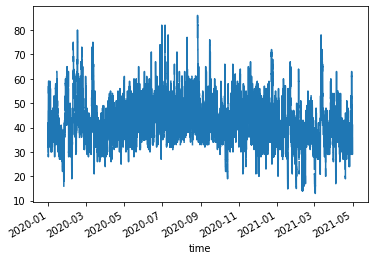

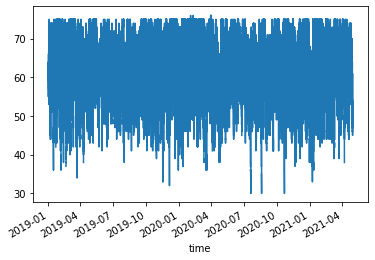

In [27]:
data.query('turbine_id == 11').assign(
    time=lambda x: pd.to_datetime(x.measured_at)
).set_index('time').temp_gear_bearing.plot()
plt.show()
data.query('turbine_id == 21').assign(
    time=lambda x: pd.to_datetime(x.measured_at)
).set_index('time').temp_gear_bearing.plot()
plt.show()

Evaluate Imputation

In [90]:
def evaluate_imputation(data,data_pred,data_full,column,print_result=False):
    """
        returns ||y_pred-y_true||_2/ (num_nan_values) for the column specified

        :param data: raw training data
        :param column (str): column name 
    """
    num_nan_values=int(data.loc[:,[column]].isnull().sum())
    sum_of_squares=float(np.sum((data_pred.loc[:,[column]]-data_full.loc[:,[column]])**2))
    average_error=np.sqrt(sum_of_squares)/num_nan_values

    if print_result:
        print("--- Column ", column, " imputation--- with ",num_nan_values ," num_nan_values: ")
        print("(Average || ||_2) absolute error: ",average_error)
    return average_error,num_nan_values

In [91]:

column="wind_speed"

data_pred=data.ffill()

evaluate_imputation(data,data_pred,data_full,column,print_result=True)

--- Column  wind_speed  imputation--- with  101176  num_nan_values: 
(Average || ||_2) error:  0.0003514285533179379


(0.0003514285533179379, 101176)